<span style="font-size: 18px; font-weight: bold">PASTICIER Benjamin</span><br>
<span style="font-size: 18px; font-weight: bold">WEIZMANN Allan</span><br>
<br><br>

<center><span style="font-size: 40px; font-weight: bold">LU3PY121 - Electromagntésime et Optique</span></center><br>
<center><span style="font-size: 35px; font-weight: bold">TP5 - Diffraction des ondes lumineuses</span></center>
<br><br><br><br>

<span style="font-size: 30px; font-weight: bold">Introduction</span> <a class="anchor" id="Sec1"></a>

Lors de ce TP, nous allons observer la diffraction de lumière passant à travers des fentes puis un réseau optique.
Pour cela, nous allons nous placer dans les conditions de Fraunhofer, ce qui va nous permettre de faire un lien entre figure de diffraction et transformée de Fourier via le principe de Huygens-Fresnel.

Nous commencerons donc par réaliser les conditions de Fraunhofer, puis nous observerons des figures de diffraction pour différentes structures optiques.

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

<br><br><br>
<span style="font-size: 30px; font-weight: bold">Diffraction en lumière spectrale</span> <a class="anchor" id="Sec2"></a>

Dans cette première partie, on cherche à se placer dans les conditions de Fraunhofer pour pouvoir par la suite observer des figures de diffraction. Cette configuration consiste à créer une image à l'infini d'une source ponctuelle avec une lentille convergente. On utilise pour cela :
- Une lampe à vapeur de mercure
- Un condenseur
- Un filtre interférentiel jaune
- Un diaphragme / fente réglable
- Une lentille convergente $L_0$ de focal $f'_0$
- Une lentille convergente $ L_1$ de focal $f'_1$
- Une loupe de Fresnel

Le condenseur permet d'augmenter l'intensité lumineuse sur le diaphragme pour obtenir une image finale avec plus de contraste. Le diaphragme / fente permet de créer notre source ponctuelle (placer une fente permet d'augmenter la luminosité par rapport à un diaphragme, mais empêche de voir la diffraction sur un des axes). Le filtre interférentiel nous permet de nous limiter à l'étude des raies jaunes de la lampe à vapeur de mercure.

La lentille $L_0$ placée à une distance $f'_0$ de l'objet permet alors de former une image de la source à l'infini, que la lentille $L_2$ fait converger sur une loupe de Fresnel placée à une distance $f'_1$ de celle-ci. Cette loupe nous permet d'observer à l'oeil les figures de diffraction, tout en étant munie d'un déplacement latéral micrométrique pour effectuer des mesures de distance d'interfranges.

Maintenant que nous sommes placés dans les conditions Fraunhofer, nous pouvons observer la diffraction à travers des fentes.

<br><br><br>



<span style="font-size: 30px; font-weight: bold">Diffraction par des fentes</span> <a class="anchor" id="Sec3"></a>

On place désormais une fente calibrée entre les deux lentilles, pour que notre "onde plane" puisse diffracter. On observe alors une figure de diffraction dans la lentille de Fresnel, avec un maximum d'intensité au centre. On fait plusieurs tests pour voir comment se comporte notre système optique.

**A.  On ouvre la fente source :**
 Le contraste diminue, l'intensité lumineuse augmente. A l'inverse, lorsqu'on ferme la fente source, le contraste augmente mais la luminosité diminue.

**B.  On translate la fente de diffraction dans son plan :**
 L'image observée ne bouge pas.

**C.  On translate la fente source dans son plan :**
 Le contraste diminue car la fente source n'est plus dans le plan focal objet de la lentille convergente $L_0$, et on observe également un grand décalage latéral de l'image dans la loupe de Fresnel.

<br>

Nous allons ensuite mesurer la taille des franges dans la loupe de Fresnel afin d'obtenir une valeur expérimentale de la largeur de la fente calibrée. En effet, on connait la fonction donnant l'intensité lumineuse sur la figure pour une fente unique de largeur a et de longueur b :  
$$I(x) = I_0sinc^2(\pi a f_X)sinc^2(\pi b f_Y)$$
Si on se place en une dimension, on se débarasse du terme en $sinc^2(\pi b f_Y)$ dans $I_0$, et on obtient alors :
$$I(x) = I_0sinc^2(\pi a f_X)$$
Le sinus cardinal s'annule pour $\pi a f_X = n\pi$, et on va donc pouvoir retrouver la valeur de a en mesurant $\Delta x$ la taille de la frange centrale :
$$a = \frac{1}{f_X} = \frac{2\lambda f'}{\Delta x}$$

Pour calculer l'erreur sur notre mesure, on la répète une petite dizaine de fois, puis on calcule la moyenne et l'écart-type de nos valeurs. On prend une valeur de 315mm pour f', qu'on a mesurée par autocollimation, et une valeur de 578e-6 mm pour lambda, ce qui correspond environ à la moyenne des deux raies jaunes de la lampe à vapeur de mercure. On répète cette expérience pour deux fentes  différentes.

In [26]:
lamb = 578e-6  #Moyenne des raies jaunes de la lampe

delta_x1 = np.array([1.320,1.176,1.149,1.520,1.431,1.250,1.316,1.514])  #distances mesurées en mm
a1 = lamb*315*2/delta_x1  #calcul de a1 en mm
print(f'Valeur de a1 : a1 = {np.mean(a1).round(2)} mm')
print(f'Ecart-type : std = {np.std(a1).round(2)} mm \n')

delta_x2 = np.array([1.514,1.678,1.577,1.515,1.672,1.554,1.846,1.677,1.620,1.319])/2  #distances mesurées en mm
a2 = lamb*315/delta_x2
print(f'Valeur de a2 : a2 = {np.mean(a2).round(2)} mm')
print(f'Ecart-type : std = {np.std(a2).round(2)} mm \n')

Valeur de a1 : a1 = 0.28 mm
Ecart-type : std = 0.03 mm 

Valeur de a2 : a2 = 0.23 mm
Ecart-type : std = 0.02 mm 



On obtient des valeurs moyennes de a1 = 0.28 mm,  et un écart-type sur nos valeurs de 0.03mm et 0.02mm . Les valeurs constructeurs données sont 0.25mm et 20mm, qui sont donc comprises dans nos mesures à 1 ou 2 sigma près. On peut donc dire que nos mesures sont cohérentes avec les valeurs constructeurs.

<br>

On prend ensuite un objet avec deux fentes, et on cherche à déterminer la distance entre les fentes à partir de mesures de la distance inter-frange de la figure de diffraction obtenue.
On sait qu'on a l'intensité lumineuse suivante dans cette configuration :
$$I = I_0sinc^2(\pi a f_X)(1 + cos(2 \pi b f_X))$$
Les phénomènes de difraction et d'interférences se mêlent. On obtient une figure ou des petites franges (interférences) apparaissent dans les plus grosses (diffraction)
Avec le même genre de raisonnement que précédemment, on va obtenir b à partir de $\Delta x$ la distance entre deux petites franges dûes aux interférences :
$$b =  \frac{2\lambda f'}{\Delta x}$$
Pour avoir une mesure précise de $\Delta x$, on mesure évidemment plusieurs interfranges puis on divise la valeur obtenue par le nombre d'interfranges comptées.


In [31]:
lamb = 578e-6  #Moyenne des raies jaunes de la lampe

delta_x = np.array([0.204,0.222,0.198,0.212,0.196,0.178,0.182,0.235,0.229])  #distances mesurées
b = lamb*315*2/delta_x
print(f'Valeur de b : b = {np.mean(b).round(2)} mm')
print(f'Ecart-type : std = {np.std(b).round(2)} mm \n')

Valeur de b : b = 1.78 mm
Ecart-type : std = 0.16 mm 



La valeur constructeur est 2mm, ce qui est donc dans nos valeurs à 2 sigma près. On trouve encore une fois ici une valeur cohérente.

<br>

Pour finir, on observe ce qu'il se passe si notre objet a cette fois-ci dix fentes (réseau). On ne distingue presque plus les interfranges dûes à la diffraction (on voit une légère différence d'intensité entre les petites interfranges). On se rapproche d'un réseau (même système avec un grand nombre de franges) pour lequel la figure obtenue est simplement des points espacés.

On a pu voir comment la diffraction formait des figures en combinaison avec des motifs d'interférences, et nous allons désormais observer le comportement de la lumière passant un travers un réseau optique.

<br><br><br>

<span style="font-size: 30px; font-weight: bold">Réseau</span> <a class="anchor" id="Sec2"></a>

Nous remplaçons maintenant la fente par un réseau et la loupe de Fresnel par écran sur lequel on mesurera les distances interfranges.

Dans un premier temps, nous chercherons à vérifier la loi donnant les angles pour lesquels le réseau diffracte qui est : $asin(\theta_n) = n\lambda$
où : 
- a est le pas du réseau
- $\lambda$ est la longueur d'onde
- $\theta$ est l'angle d'incidence
- n est un entier quelconque 

Vérifions la proportionnalité entre $sin \theta_n$ et n : 
On prend n allant de -2 à 2 (5 valeurs) et on mesure les angles pour lesquels on obtient une raie jaune du mercure via la distance au centre de l'écran :
$$tan(\theta) = \frac{dist}{f'}$$
Ou f' est la distance écran - lentille, toujours mesurée par autocollimation.

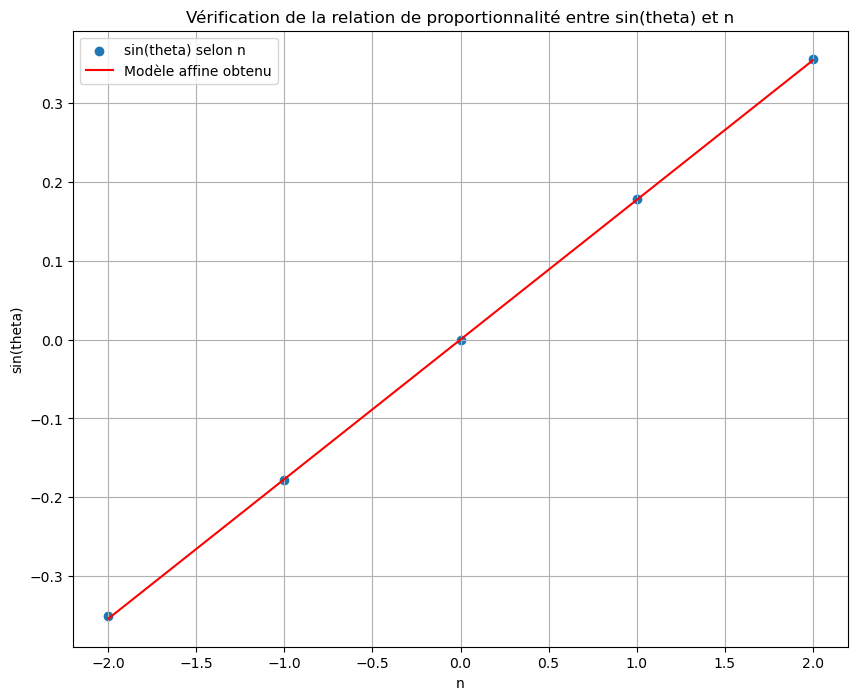

In [40]:
dist = np.array([-11.8, -5.7, 0, 5.7, 12]) #en cm
n = np.array([-2, -1, 0, 1, 2])
f = 315 #en mm
theta = np.arctan(dist*10/f)

# Modèle
def lin(x,a):
    return a*x

# Paramètres initiaux
a0 = 1
p0 = np.array([a0]) 

# Ajustement
popt, cov = curve_fit(lin, n, np.sin(theta), p0=p0)
a_opti = popt[0]


# Graphique
plt.figure(figsize=(10,8))
plt.scatter(n, np.sin(theta), label="sin(theta) selon n")
xplot = np.linspace(n[0], n[-1], 50)
plt.plot(xplot, lin(xplot, a_opti), label="Modèle affine obtenu", color='red')
plt.xlabel("n")
plt.ylabel("sin(theta)")
plt.title("Vérification de la relation de proportionnalité entre sin(theta) et n")
plt.legend(loc=2)
plt.grid()


On observe bien une relation linéaire entre le sinus de theta et n, et on retrouve bien theta = 0 pour n = 0. Pour n = 1, on a la relation $asin(\theta_n) = \lambda$, et on doit donc obtenir la longueur d'onde en multipliant sin(theta) par a (pas du réseau).

Notre réseau nous indique qu'il possède 315,5 fentes / mm , on peut donc calculer son pas : a = 1/(315.5 * 10e3) = 3.16 * 10e-6 m.

On calcule alors a*sin(theta) = 3.16 * 10e-6 * sin(arctan(57/315)) = 5.63 * 10e-7 m = 563 nm

C'est une valeur tout à fait cohérente vis-à-vis de la longueur d'onde théorique de 578nm pour le jaune.

On étalonne ensuite notre système pour chaque longueur d'onde, avec n = 1.

On retrouve la longueur d'onde du vert par le calcul : lambda = 554.5 nm


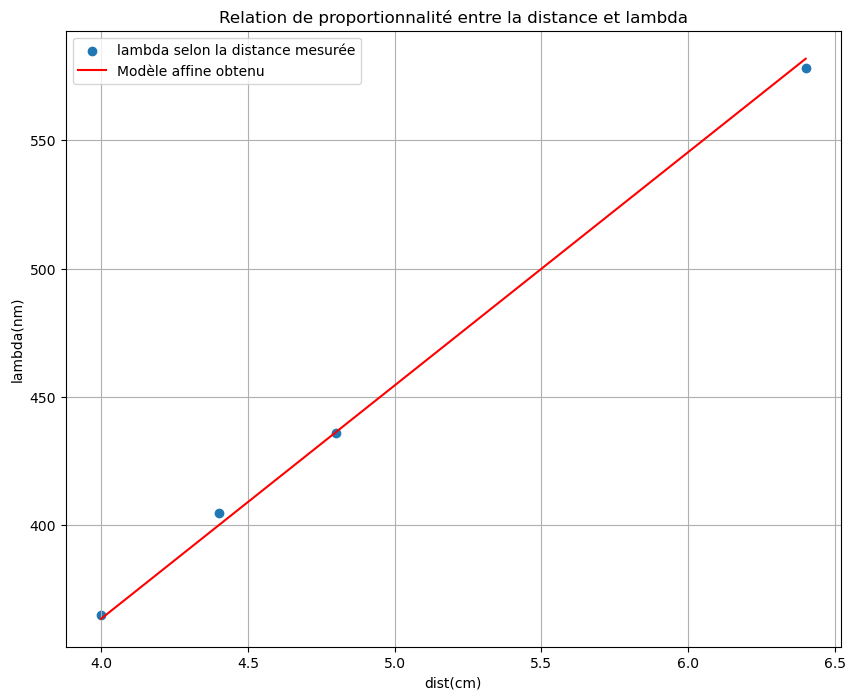

In [45]:
dist = np.array([4.0, 4.4, 4.8, 6.4]) #en cm
lam = np.array([365.02, 404.66, 435.83, 578.0]) #en nm

# Modèle
def lin(x,a):
    return a*x

# Paramètres initiaux
a0 = 1
p0 = np.array([a0]) 

# Ajustement
popt, cov = curve_fit(lin, dist, lam, p0=p0)
a_opti = popt[0]


# Graphique
plt.figure(figsize=(10,8))
plt.scatter(dist, lam, label="lambda selon la distance mesurée")
xplot = np.linspace(dist[0], dist[-1], 50)
plt.plot(xplot, lin(xplot, a_opti), label="Modèle affine obtenu", color='red')
plt.xlabel("dist(cm)")
plt.ylabel("lambda(nm)")
plt.title("Relation de proportionnalité entre la distance et lambda")
plt.legend(loc=2)
plt.grid()

print(f"On retrouve la longueur d'onde du vert par le calcul : lambda = {lin(6.1, a_opti).round(1)} nm")


A l'aide de cet étalonnage et de l'ajustement linéaire, on peut retrouver la longueur d'onde de la raie verte : 554.5 nm. Etant donné le peu de temps qu'il nous restait pour finir le TP, nous n'avons pas calculé les incertitudes.

<br><br><br>

<span style="font-size: 30px; font-weight: bold">Conclusion</span> <a class="anchor" id="Sec5"></a>

Lors de ce TP, nous avons pu intégrer les figures de diffraction/interférence d'une lumière spectrale pour plusieurs objets optiques. On a pu voir comment les deux phénomènes se superposent pour créer des images selon la distance entre les fentes et la largeur de celles-ci, mais aussi la diffraction de la lumière par un réseau selon la longueur d'onde des raies qui le compose.